# All the analysys below refers only to playoff stats

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import xlsxwriter
from openpyxl import load_workbook

from ipynb.fs.full.UtilCollections import SEASONS, PLAYER_STATS, TEAMS
from ipynb.fs.full.UtilFunctions import format_season, spearman_rank_corr

In [2]:
SEASONS = SEASONS[3:]

In [3]:
def calculate_rank_corr_by_player_stat(df, standings, stat, measure="mean"): #measure might be mean, sd or max
    if measure == "mean":
        grouped_df = pd.DataFrame(df.groupby(by=['Tm']).mean())
    elif measure == "sd":
        grouped_df = pd.DataFrame(df.groupby(by=['Tm']).std())
    elif measure == "max":
        grouped_df = pd.DataFrame(df.groupby(by=['Tm']).max())
    grouped_df.sort_values(by=[stat, 'Tm'], ascending=[False, True], inplace=True)
    
    teams = list(grouped_df.index)
    if "TOT" in teams:
        teams.remove("TOT")
    rank = range(1, 17)
    zip_iterator = zip(teams, rank)

    teams_ordered_by_stat = dict(zip_iterator)
    
    standings = standings[["Team"]]
    standings.index += 1
    
    standings_zip = zip(list(standings['Team']), standings.index)
    
    standings_dict = dict(standings_zip)
    
    
    rank1 = []
    rank2 = []
    for team in TEAMS:
        if team in standings_dict:
            rank1.append(teams_ordered_by_stat[team])
            rank2.append(standings_dict[team])

    
    return spearman_rank_corr(rank1, rank2)

In [4]:
def calculate_rank_corr_by_team_stat(df, standings, stat):
    
    corr_df = df.sort_values(by=[stat, 'Team'], ascending=[False, True])
    
    corr_df.set_index('Team', inplace=True)
    
    teams = list(corr_df.index)
    rank = range(1, 17)
    zip_iterator = zip(teams, rank)

    teams_ordered_by_stat = dict(zip_iterator)
    
    standings = standings[["Team"]]
    standings.index += 1
    
    standings_zip = zip(list(standings['Team']), standings.index)
    
    standings_dict = dict(standings_zip)
    
    
    rank1 = []
    rank2 = []
    for team in TEAMS:
        if team in standings_dict:
            rank1.append(teams_ordered_by_stat[team])
            rank2.append(standings_dict[team])

    return spearman_rank_corr(rank1, rank2)

In [5]:
def rank_player_corrs_to_excel(dfs, standings_dfs, stat, measure="mean"):
    corrs = [stat, measure]
    
    n = len(dfs)
    print(n)
    for i in range(n):
        corrs.append(calculate_rank_corr_by_player_stat(dfs[i], standings_dfs[i], stat, measure))
        
    wb = load_workbook("DataCollection/Correlation/Rank_Correlation_Player_Stats_Playoffs.xlsx")
    ws = wb.worksheets[0]
    
    ws.append(corrs)
    wb.save("DataCollection/Correlation/Rank_Correlation_Player_Stats_Playoffs.xlsx")

In [20]:
for stat in PLAYER_STATS:
    for measure in ['mean', 'sd', 'max']:
        rank_player_corrs_to_excel(player_dfs, standings_dfs, stat, measure)

19


BadZipFile: File is not a zip file

In [7]:
def rank_team_corrs_to_excel(dfs, standings_dfs, stat):
    corrs = [stat]
    
    n = len(dfs)
    
    for i in range(n):
        corrs.append(calculate_rank_corr_by_team_stat(dfs[i], standings_dfs[i], stat))
        
    wb = load_workbook("Rank_Correlation_Team_Stats_Playoffs.xlsx")
    ws = wb.worksheets[0]
    
    ws.append(corrs)
    wb.save("Rank_Correlation_Team_Stats_Playoffs.xlsx")

In [8]:
def get_csvs_by_season(season):
    first_year, second_year = format_season(season)
    
    player_df = pd.read_csv("DataCollection/Player_Stats_Playoffs/player_stats_playoffs_{0}-{1}.csv".format(first_year, second_year))
    team_df = pd.read_csv("DataCollection/Team_stats_Playoffs/team_stats_playoffs{0}-{1}.csv".format(first_year, second_year))
    adv_team_df = pd.read_csv("DataCollection/Advanced_Team_Stats_Playoffs/adv_team_stats_Playoffs_{0}-{1}.csv".format(first_year, second_year))
    opponent_df = pd.read_csv("DataCollection/Opponent_Stats_Playoffs/opponent_stats_Playoffs_{0}-{1}.csv".format(first_year, second_year))
    standings_df = pd.read_csv("DataCollection/Standings_Playoffs/playoff_standings_{0}-{1}.csv".format(first_year, second_year))
    return player_df, team_df, adv_team_df, opponent_df, standings_df

In [9]:
player_dfs, team_dfs, adv_team_dfs, opponent_dfs, standings_dfs = [], [], [], [], []

for season in SEASONS[1:]:
    player_df, team_df, adv_team_df, opponent_df, standings_df = get_csvs_by_season(season)
    player_dfs.append(player_df)
    team_dfs.append(team_df)
    adv_team_dfs.append(adv_team_df)
    opponent_dfs.append(opponent_df)
    standings_dfs.append(standings_df)

# Player Stats Correlation

In [12]:
playoff_player_corrs_df = pd.read_excel("DataCollection/Correlation/Rank_Correlation_Player_Stats_Playoffs.xlsx")
playoff_player_corrs_df.set_index(["Stat", "Measure"], inplace=True)
playoff_player_corrs_df

2003      2004      2005      2006      2007      2008  \
Stat Measure                                                               
Age  mean     0.361765  0.376471  0.476471  0.355882  0.155882  0.000000   
     sd       0.350000  0.391176  0.211765  0.261765 -0.020588 -0.094118   
     max      0.155882  0.120588  0.355882  0.276471  0.194118  0.108824   
FG   mean     0.047059  0.102941  0.141176 -0.429412 -0.085294  0.091176   
     sd       0.435294  0.055882  0.467647 -0.373529  0.041176  0.264706   
...                ...       ...       ...       ...       ...       ...   
BPM  sd      -0.411765 -0.247059  0.167647  0.432353 -0.258824  0.147059   
     max     -0.126471  0.161765 -0.094118  0.338235 -0.176471  0.429412   
VORP mean     0.964706  0.964706  0.970588  0.955882  0.917647  0.955882   
     sd       0.970588  0.908824  0.920588  0.932353  0.864706  0.902941   
     max      0.970588  0.876471  0.841176  0.908824  0.820588  0.932353   

                  2009      2010      2011      2012      2013      2014  \
Stat Measure                                                               
Age  mean     0.352941  0.352941  0.082353  0.035294  0.314706  0.402941   
     sd       0.017647 -0.164706  0.158824 -0.085294  0.270588  0.705882   
     max      0.191176  0.338235  0.205882  0.032353  0.461765  0.444118   
FG   mean     0.138235 -0.094118  0.150000 -0.088235 -0.358824 -0.050000   
     sd      -0.058824  0.764706  0.105882  0.567647  0.229412  0.185294   
...                ...       ...       ...       ...       ...       ...   
BPM  sd      -0.541176 -0.235294 -0.191176 -0.255882 -0.314706 -0.041176   
     max     -0.482353  0.179412 -0.261765 -0.088235 -0.032353 -0.158824   
VORP mean     0.967647  0.982353  0.973529  0.970588  0.917647  0.882353   
     sd       0.847059  0.858824  0.938235  0.955882  0.882353  0.852941   
     max      0.738235  0.847059  0.955882  0.911765  0.855882  0.876471   

                  2015      2016      2017      2018      2019      2020  \
Stat Measure                                                               
Age  mean     0.055882  0.417647  0.217647  0.182353  0.202941  0.252941   
     sd      -0.020588  0.376471  0.147059 -0.226471  0.344118 -0.091176   
     max     -0.214706  0.150000  0.123529 -0.088235  0.408824  0.094118   
FG   mean    -0.223529  0.247059 -0.179412  0.270588 -0.341176  0.073529   
     sd       0.647059  0.052941  0.405882  0.550000  0.108824  0.311765   
...                ...       ...       ...       ...       ...       ...   
BPM  sd      -0.202941 -0.179412 -0.094118 -0.435294 -0.017647 -0.308824   
     max      0.088235  0.188235  0.129412  0.100000  0.461765 -0.123529   
VORP mean     0.973529  0.935294  0.944118  0.970588  0.958824  0.976471   
     sd       0.932353  0.867647  0.929412  0.920588  0.932353  0.938235   
     max      0.917647  0.855882  0.911765  0.923529  0.914706  0.917647   

                  2021  
Stat Measure            
Age  mean     0.420588  
     sd      -0.255882  
     max      0.447059  
FG   mean    -0.300000  
     sd       0.111765  
...                ...  
BPM  sd      -0.388235  
     max     -0.132353  
VORP mean     0.897059  
     sd       0.861765  
     max      0.879412  

[129 rows x 19 columns]

In [15]:
reg_season_player_corrs_df = pd.read_excel("DataCollection/Correlation/Rank_Correlation_Player_Stats.xlsx")
reg_season_player_corrs_df.set_index(["Stat", "Measure"], inplace=True)
reg_season_player_corrs_df

2003      2004      2005      2006      2007      2008  \
Stat   Measure                                                               
Age    mean     0.713793  0.494581  0.170189  0.579978  0.553726  0.421580   
       sd       0.314286  0.067980 -0.043382  0.225362  0.537264  0.213793   
       max      0.501478  0.193103  0.049166  0.311235  0.539043  0.184872   
MP     mean    -0.332020 -0.250739 -0.435373 -0.487875 -0.137264 -0.358843   
       sd       0.473892  0.220197  0.442492  0.349944  0.031368  0.296107   
...                  ...       ...       ...       ...       ...       ...   
VORP   sd       0.800985  0.652709  0.659177  0.696107  0.647164  0.878087   
       max      0.768473  0.479310  0.539488  0.615128  0.684538  0.829588   
Salary mean    -0.238916 -0.218719  0.040712  0.229811  0.208009 -0.041602   
       sd      -0.303448 -0.058128 -0.188877  0.122581  0.055840 -0.081646   
       max     -0.328571 -0.130049 -0.163070  0.054950 -0.024694 -0.272080   

                    2009      2010      2011      2012      2013      2014  \
Stat   Measure                                                               
Age    mean     0.304561  0.435818  0.644494  0.578198  0.329922  0.581758   
       sd       0.152836  0.283648  0.476752  0.216908  0.412681  0.271635   
       max      0.159511  0.500779  0.586207  0.305451  0.479422  0.366407   
MP     mean    -0.402892 -0.156396 -0.439822 -0.361958 -0.461179 -0.463849   
       sd       0.368632  0.309010  0.387319  0.579978  0.517241  0.406452   
...                  ...       ...       ...       ...       ...       ...   
VORP   sd       0.775306  0.848276  0.834483  0.784650  0.864294  0.806007   
       max      0.755729  0.827809  0.796218  0.709900  0.808231  0.713904   
Salary mean     0.149722  0.459844  0.234260  0.382425  0.484316  0.464739   
       sd       0.396218  0.493215  0.231591  0.291212  0.690768  0.536819   
       max      0.256952  0.442937  0.238265  0.236485  0.571969  0.452725   

                    2015      2016      2017      2018      2019      2020  \
Stat   Measure                                                               
Age    mean     0.493215  0.401112  0.336151  0.341935  0.204449  0.441602   
       sd       0.121246  0.119021  0.134594  0.165295 -0.094994  0.151947   
       max      0.091880  0.134149  0.162180  0.083871 -0.074527  0.325028   
MP     mean    -0.443826 -0.476752 -0.245384 -0.563515 -0.607564 -0.429588   
       sd       0.466073  0.586652  0.434038  0.668521  0.494549  0.369967   
...                  ...       ...       ...       ...       ...       ...   
VORP   sd       0.784650  0.791324  0.821580  0.828254  0.776641  0.812236   
       max      0.761068  0.831368  0.696107  0.785539  0.667631  0.735706   
Salary mean     0.608009  0.684093  0.441157  0.541268  0.454950  0.084761   
       sd       0.471858  0.421580  0.576418  0.601780  0.365517  0.280979   
       max      0.378420  0.288988  0.596885  0.542158  0.384650  0.380645   

                    2021      2022  
Stat   Measure                      
Age    mean     0.589766  0.428254  
       sd       0.195551  0.107453  
       max      0.323693  0.474972  
MP     mean    -0.661846 -0.118576  
       sd       0.551947  0.221357  
...                  ...       ...  
VORP   sd       0.828254  0.605784  
       max      0.727253  0.591546  
Salary mean     0.170634  0.358843  
       sd       0.337486  0.369967  
       max      0.279199  0.321468  

[135 rows x 20 columns]

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
2003    0.361765
2004    0.376471
2005    0.476471
2006    0.355882
2007    0.155882
2008    0.000000
2009    0.352941
2010    0.352941
2011    0.082353
2012    0.035294
2013    0.314706
2014    0.402941
2015    0.055882
2016    0.417647
2017    0.217647
2018    0.182353
2019    0.202941
2020    0.252941
2021    0.420588
Name: (Age, mean), dtype: float64


ValueError: x and y must have same first dimension, but have shapes (20,) and (19,)

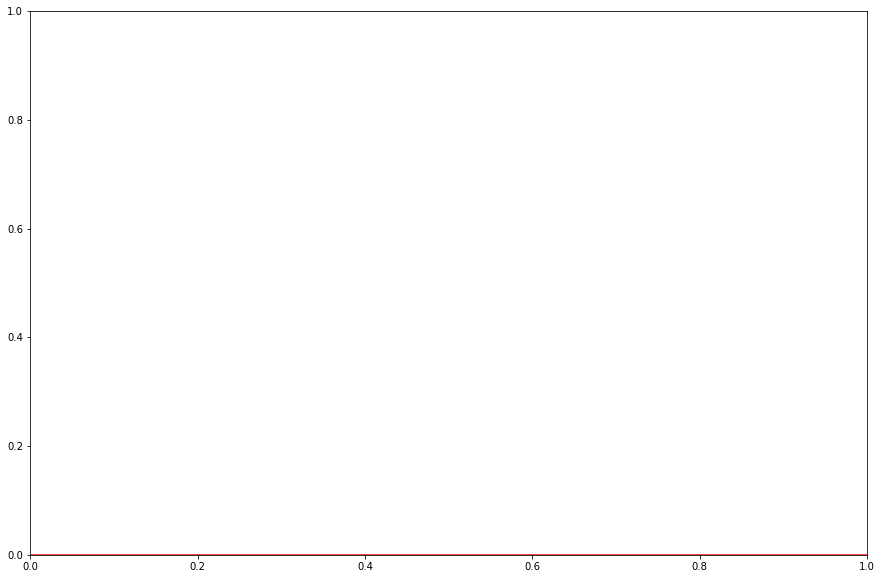

In [17]:
for stat, measure in playoff_player_corrs_df.index:
    plt.figure(figsize=(15,10))
    
    plt.axhline(y=0.0, color='r', linestyle='-')
    print(SEASONS)
    print(playoff_player_corrs_df.loc[stat, measure])
    plt.plot(SEASONS, playoff_player_corrs_df.loc[stat, measure], label=stat + " " + measure + " Playoffs")
    plt.plot(SEASONS, reg_season_player_corrs_df.loc[stat, measure], label=stat + " " + measure + " Regular Season" )
    plt.xticks(SEASONS)
    plt.yticks([-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1,0])
    plt.ylabel("Correlation")

    plt.title(f"Correlation between {stat} {measure} of the players and the team success")
    plt.legend()
    plt.show()

# Team Stats correlation

In [ ]:
playoff_team_corrs_df = pd.read_excel("DataCollection/Correlation/Rank_Correlation_Team_Stats_Playoffs.xlsx")
playoff_team_corrs_df.set_index(["Stat"], inplace=True)
playoff_team_corrs_df

In [ ]:
reg_season_team_corrs_df = pd.read_excel("DataCollection/Correlation/Rank_Correlation_Team_Stats.xlsx")
reg_season_team_corrs_df.set_index(["Stat"], inplace=True)
reg_season_team_corrs_df = reg_season_team_corrs_df.drop(2022, 1)
reg_season_team_corrs_df

In [ ]:
for stat in playoff_team_corrs_df.index:
    plt.figure(figsize=(15,10))
    
    plt.axhline(y=0.0, color='r', linestyle='-')

    plt.plot(SEASONS, playoff_team_corrs_df.loc[stat], label=stat + " Playoffs")
    plt.plot(SEASONS, reg_season_team_corrs_df.loc[stat], label=stat + " Regular Season" )
    plt.xticks(SEASONS)
    plt.yticks([-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1,0])
    plt.ylabel("Correlation")

    plt.title(f"Correlation between {stat} for the team and the team success")
    plt.legend()
    plt.show()